### Import

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [106]:
nPoints = 200
nDim = 2
learningRate = 0.05
noiselevel = 5
nEpochs = 100
basecoef = np.random.random((nDim))

### Generate Data

In [107]:
x1 = np.random.multivariate_normal([-2,-2],[[noiselevel,0],[0,noiselevel]],nPoints/2)
x2 = np.random.multivariate_normal([2,2],[[noiselevel,0],[0,noiselevel]],nPoints/2)
X = np.ones((nPoints,nDim+1))
X[:,:2] = np.vstack((x1,x2))
y = np.hstack((np.zeros(nPoints/2),np.ones(nPoints/2)))

### Plot

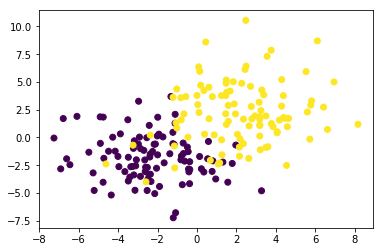

In [108]:
plt.scatter(X[:,0],X[:,1],c=y);

### Hypothesis

In [109]:
def hypothesis(X,coef):
    
    return np.dot(X,coef)

### Sigmoid

In [110]:
def sigmoid(z):
    
    return 1.0 / (1.0 + np.exp(-z))

### Logloss

In [111]:
def logloss(h,y):
    
    return -y * np.log(h) + (1.0-y)*np.log(1.0-h)

### Gradient Descent

In [112]:
loss = []
coef = np.random.random((nDim+1))
for i in range(nEpochs):
    z = hypothesis(X,coef)
    h = sigmoid(z)
    loss.append(np.sum(logloss(h,y)**2))
    gradient = np.dot(X.T,h-y) / y.shape[0]
    coef = coef - (gradient*learningRate)

### Plot Loss

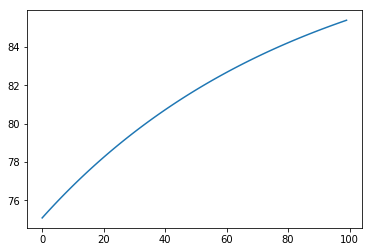

In [113]:
plt.plot(loss)

### Predict Probability

In [114]:
def predict_probability(X,coef):
    
    z = np.dot(X,coef)
    h = sigmoid(z)
    return h

### Predict Class

In [115]:
def predict_class(X,coef,threshold):
    
    z = np.dot(X,coef)
    h = sigmoid(z)
    return (h > threshold) * 1.0

### Predict

In [116]:
ypred = predict_class(X,coef,0.5)
float(np.sum(ypred == y)) / float(X.shape[0])

0.915

### Compute ROC Curve

In [117]:
rates = []
xval = np.linspace(0.01,0.99,100)
for threshold in xval:
    h = predict_class(X,coef,threshold)
    yis0 = np.where(y == 0)[0]
    yis1 = np.where(y == 1)[0]
    his0 = np.where(h == 0)[0]
    his1 = np.where(h == 1)[0]    
    tp = float(len(np.intersect1d(yis1,his1)))
    fp = float(len(np.intersect1d(yis0,his1)))    
    fn = float(len(np.intersect1d(yis1,his0)))    
    tn = float(len(np.intersect1d(yis0,his0)))    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    rates.append((fpr,tpr))

### Plot

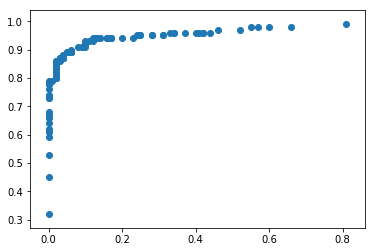

In [118]:
rates = np.array(rates)
plt.scatter(rates[:,0],rates[:,1])